In [8]:
import re
import dgl
import torch
import random
import pickle
import numpy as np
import networkx as nx
import dgl.function as fn
from torch.utils.data import DataLoader
from proposed_model.data_loader import SubsData, load_data
# from baselines.naive_baselines import *

In [11]:
graph, train_dataset, val_dataset, test_dataset, ingredients, node_count2id, node_id2name, node_id2count = load_data(1, 43, False, dir_ = '/private/home/baharef/inversecooking2.0/data/flavorgraph')

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, sampler=None,
                                        batch_sampler=None, num_workers=0, collate_fn=SubsData.collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=True, sampler=None,
                                batch_sampler=None, num_workers=0, collate_fn=SubsData.collate_fn_val_test)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True, sampler=None,
                                batch_sampler=None, num_workers=0, collate_fn=SubsData.collate_fn_val_test)
nx_g = dgl.to_networkx(graph.cpu(), edge_attrs=['w'])
nx_undirected = nx.DiGraph.to_undirected(nx_g)
nx.is_connected(nx_undirected)

#nodes: 8298
#ingredient nodes: 6653
#compound nodes: 1645
Number of datapoints in train 53221
Number of datapoints in val 11669
Number of datapoints in test 11807


False

In [ ]:
def load_vocab():
    return pickle.load(open('/private/home/baharef/inversecooking2.0/data/substitutions/vocab_ingrs.pkl', 'rb'))
vocabs = load_vocab()

In [ ]:
def node2name(node_count):
    return node_id2name[node_count2id[node_count]]
print(node2name(7149))

In [ ]:
rank_file = open("/private/home/baharef/inversecooking2.0/proposed_model/MLP_CAT2_rankings.txt", "r")

ranks = []
counter = 0
for line in rank_file:
    ing1, ing2, rank, ing3 = line.strip().split()
    name1 = node2name(int(ing1))
    name2 = node2name(int(ing2))
    name3 = node2name(int(ing3))
    ranks.append(int(rank))
    if rank == 1:
        print(name1, name2, name3, rank)
#         counter += 1
    
print(np.mean(ranks), np.min(ranks), np.max(ranks))

In [ ]:
def create_lookup_table_train():
    train_table = {}
    for batch in train_dataloader:
        ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()
        if ing1 not in train_table:
            train_table[ing1] = []
        train_table[ing1].append(ing2)
    return train_table

In [ ]:
train_table = create_lookup_table_train()

In [12]:
lengths = dict(nx.shortest_path_length(nx_g))
# lengths = dict(nx.algorithms.shortest_paths.weighted.all_pairs_dijkstra(nx_g,  weight='w'))


In [26]:
pickle.dump(lengths, open('here.txt', 'wb'))

In [16]:
l = []
for batch in train_dataloader:
    ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()
    context = batch[0][2:].cpu().numpy()
    context = context[context>0]
    for cont in context:
        if cont != ing1:
            l.append(lengths[ing1][cont])
print(len(l), np.mean(l), np.min(l), np.max(l))

469717 1.9678593706423229 1 4


1 1.9678593706423229 4


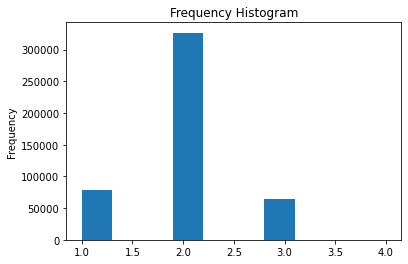

In [27]:
import matplotlib.pyplot as plt
plt.hist(l)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
print(np.min(l), np.mean(l), np.max(l))

In [24]:
values = []
for i in range(1, 8299):
    for j in range(1, 8299):
        values.append(lengths[i][j])

0 2.9502384397626122 5


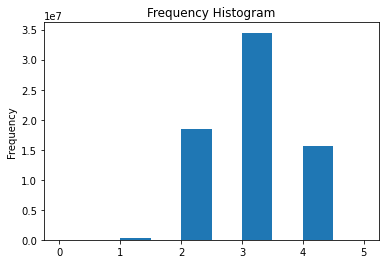

In [25]:
plt.hist(values)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
print(np.min(values), np.mean(values), np.max(values))

In [29]:
cnt1 = 0
for ind in range(len(l)):
    if l[ind] == 1:
        cnt1 += 1
print(cnt1)

cnt1 = 0
for ind in range(len(values)):
    if values[ind] == 1:
        cnt1 += 1
print(cnt1)

79205
294358


In [ ]:

# counter1 = 0
# counter2 = 0

# distances_all = []
# distances1 = []
# distances2 = []
# distances3 = []

# n_nodes_2 = []

all_ = 0
counter = 0

for batch in test_dataloader:
    all_ += 1
    ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()
    name1 = node_id2name[node_count2id[ing1]]
    name2 = node_id2name[node_count2id[ing2]]
    
#     path = nx.shortest_path(nx_g, ing1, ing2)
#     dst = len(path) - 1
    dst = lengths[ing1][ing2]
    
    if dst == 2:
        counter += 1
#         counter = 0
#         all_dst = lengths[ing1]
# #         print(all_dst)
#         for key in all_dst:
#             if all_dst[key] == 2:
#                 counter += 1
#         n_nodes_2.append(counter)
            
        
#     distances_all.append(dst)
#     if ing1 not in train_table:
#         counter1 += 1
#         distances1.append(dst)
#     elif ing2 not in train_table[ing1]:
#         counter2 += 1
#         distances2.append(dst)
#     else:
#         distances3.append(dst)

print(counter/all_)
# print(counter1/all_)
# print(counter2/all_)

# print(np.mean(distances_all), np.mean(distances1), np.mean(distances2), np.mean(distances3))

In [ ]:
len(n_nodes_2)

In [ ]:
plt.hist(n_nodes_2)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
print(np.min(n_nodes_2), np.mean(n_nodes_2), np.max(n_nodes_2))

In [ ]:
c1 = 0
for dst in distances_all:
    if dst <= 2:
        c1 += 1
print(c1/len(distances_all))

In [2]:
ing_names = []
# for key in node_id2name:
#     ing_names.append(node_id2name[key])
# print(len(ing_names))
for cnt in node_count2id:
    ing_names.append(node_id2name[node_count2id[cnt]])
print(len(ing_names))

NameError: name 'node_count2id' is not defined

In [ ]:
from utils import load_foodbert, get_bert_emb
# tokenizer, bert = load_foodbert()
device = torch.device('cuda')
ing_embeddings_bert = get_bert_emb(ing_names, device, tokenizer, bert)

In [ ]:
emb_file = open('/private/home/baharef/inversecooking2.0/proposed_model/node2vec/food_bert.txt', 'wb')
pickle.dump(ing_embeddings, emb_file)


In [ ]:
print(ing_embeddings.shape)

In [ ]:
all_ = 0
counter1 = 0
counter2 = 0

distances_all = []
distances1 = []
distances2 = []
distances3 = []
for batch in test_dataloader:
    all_ += 1
    ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()
    name1 = node_id2name[node_count2id[ing1]]
    name2 = node_id2name[node_count2id[ing2]]
    name1_ind = ing_names.index(name1)
    name2_ind = ing_names.index(name2)
    distances_all.append(dst)
    if ing1 not in train_table:
        counter1 += 1
        distances1.append(dst)
    elif ing2 not in train_table[ing1]:
        counter2 += 1
        distances2.append(dst)
    else:
        distances3.append(dst)
    
print(counter1/all_)
print(counter2/all_)

print(np.mean(distances_all), np.mean(distances1), np.mean(distances2), np.mean(distances3))

In [ ]:
import matplotlib.pyplot as plt

plt.hist(distances_all, color='blue')
plt.gca().set(ylabel='foodbert distance')

In [ ]:
plt.hist(distances2, color='red')
plt.gca().set(ylabel='foodbert distance')

In [ ]:
plt.hist(distances1, color='green')
plt.gca().set(ylabel='foodbert distance')

In [ ]:
import os
import copy
import numpy as np
import torch
import torch.nn.functional as F

from baselines.gcn.data_loader import SubsData, load_data
from baselines.gcn.models import GCN
from torch.utils.data import DataLoader
from gcn.state_loader import save_model, load_saved_models, create_output_dir

In [ ]:
cfg = {'epochs': 1000, 'task': "subs", 'name': "gcn", 'lr': 0.005, 'w_decay': 0, 'hidden': 200, 'emb_d': 32, 'dropout': 0.0,\
        'nlayers': 3, 'val_itr': 100, 'nr': 1, 'ntrials': 1, 'train_batch_size': 1000, 'val_test_batch_size': 500, 'margin': 0.7}

params = 'lr_' + str(cfg['lr'])
params += '_w_decay_' + str(cfg['w_decay'])
params += '_hidden_' + str(cfg['hidden'])
params += '_emb_d_' + str(cfg['emb_d'])
params += '_dropout-' + str(cfg['dropout'])
params += '_nlayers_' + str(cfg['nlayers'])
params += '_nr_' + str(cfg['nr'])
params += '_margin_' + str(cfg['margin'])

adj, train_dataset, val_dataset, test_dataset, n_ingrs, _, _, _= load_data(cfg['nr'], dir_ = '/private/home/baharef/inversecooking2.0/data/flavorgraph')
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=cfg['emb_d'], hidden_channels=cfg['hidden'], num_layers=cfg['nlayers'], dropout=cfg['dropout'], adj=adj, device=device).to(device)
opt = torch.optim.Adam(model.parameters(), lr=cfg['lr'], weight_decay=cfg['w_decay'])
cos_layer = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
base_dir = '/checkpoint/baharef/gcn/aug-16/margin/checkpoints/'
output_dir = os.path.join(base_dir, params)
model, opt, best_model = load_saved_models(output_dir, model, opt)


In [ ]:
best_model.eval()
best_embeddings = best_model()
print(best_embeddings.shape)
nx_g = dgl.to_networkx(adj.cpu())
nx_undirected = nx.DiGraph.to_undirected(nx_g)
nx.is_connected(nx_undirected)

In [ ]:
sims1_2 = []
sims2_3 = []
sims1_3 = []
for batch in test_dataloader:
    all_ += 1
    ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()
    path = nx.shortest_path(nx_undirected, ing1, ing2)
    if len(path) == 3:
        emb1 = torch.index_select(best_embeddings, 0, torch.tensor(path[0]).to(device))
        emb2 = torch.index_select(best_embeddings, 0, torch.tensor(path[1]).to(device))
        emb3 = torch.index_select(best_embeddings, 0, torch.tensor(path[2]).to(device))
        sims1_2.append(cos_layer(emb1, emb2))
        sims2_3.append(cos_layer(emb2, emb3))
        sims1_3.append(cos_layer(emb1, emb3))
    

In [ ]:
print(torch.mean(torch.tensor(sims1_2)), torch.mean(torch.tensor(sims2_3)), torch.mean(torch.tensor(sims1_3)))

In [ ]:
for i in range(len(sims1_2)):
    sims1_2[i] = sims1_2[i].cpu().item()
    sims2_3[i] = sims2_3[i].cpu().item()
    sims1_3[i] = sims1_3[i].cpu().item()

In [ ]:
plt.hist(sims1_2, bins=30)
plt.gca().set(title='cosine similarity 1-2', ylabel='Frequency')
plt.show()

In [ ]:
plt.hist(sims1_3, bins=30)
plt.gca().set(title='cosine similarity 1-3', ylabel='Frequency')
plt.show()

In [ ]:
plt.hist(sims2_3, bins=30)
plt.gca().set(title='cosine similarity 2-3', ylabel='Frequency')
plt.show()

In [ ]:
plt.hist(sims1_2, bins=30, color='r')
plt.hist(sims2_3, bins=30, color='b')
plt.hist(sims1_3, bins=30, color='g')
plt.gca().set(title='cosine similarities', ylabel='Frequency')
plt.show()

In [ ]:
all_ = 0
counter1 = 0
counter2 = 0
counter3 = 0

train_table = create_lookup_table_train()
for batch in test_dataloader:
    all_ += 1
    ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()

    if ing1 not in train_table:
        counter1 += 1
    elif ing2 not in train_table[ing1]:
        counter2 += 1
    else:
        counter3 += 1

print(counter_ing, counter_compound)

print(counter1/all_)
print(counter2/all_)
print(counter3/all_)


In [ ]:
ranks = open('/private/home/baharef/inversecooking2.0/baselines/ranks.txt', 'r')

ranks1, ranks2, ranks3, ranks_all = [], [], [], []
for line in ranks:
#     print(line.strip())
    
    ing1, ing2, rank = re.split(',|:', line.strip())
    ing1, ing2, rank = int(ing1), int(ing2), int(rank)
    
    ranks_all.append(rank)
    if ing1 not in train_table:
        ranks1.append(rank)
    elif ing2 not in train_table[ing1]:
        ranks2.append(rank)
    else:
        ranks3.append(rank)
        
print(len(ranks_all), len(ranks1), len(ranks2), len(ranks3))

compute_metrics(ranks_all)
compute_metrics(ranks1)
compute_metrics(ranks2)
compute_metrics(ranks3)

In [ ]:
ranks = open('/private/home/baharef/inversecooking2.0/baselines/gcn/ranks.txt', 'r')

ranks1, ranks2, ranks3, ranks_all = [], [], [], []
for line in ranks:
#     print(line.strip())
    
    ing1, ing2, rank = re.split(',|:', line.strip())
    ing1, ing2, rank = int(ing1), int(ing2), int(rank)
    
    ranks_all.append(rank)
    if ing1 not in train_table:
        ranks1.append(rank)
    elif ing2 not in train_table[ing1]:
        ranks2.append(rank)
    else:
        ranks3.append(rank)
        
print(len(ranks_all), len(ranks1), len(ranks2), len(ranks3))

compute_metrics(ranks_all)
compute_metrics(ranks1)
compute_metrics(ranks2)
compute_metrics(ranks3)

In [ ]:
def compute_metrics(ranks):
    mrr, hit1, hit3, hit10 = 0.0, 0.0, 0.0, 0.0
    
    for rank in ranks:
        mrr += (1/rank)
        if rank <= 1:
            hit1 += 1.0
        if rank <=3 :
            hit3 += 1.0
        if rank <= 10:
            hit10 += 1.0
    print(mrr/len(ranks)*100, hit1/len(ranks)*100, hit3/len(ranks)*100, hit10/len(ranks)*100)
    
def create_lookup_table_ingredient_frequency():
    train_table = {}
    for batch in train_dataloader:
        ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()
        if ing1 not in train_table:
            train_table[ing1] = {}
        if ing2 not in train_table[ing1]:
            train_table[ing1][ing2] = 0
        train_table[ing1][ing2] += 1
        
    for ing in train_table:
        sorted_list = list(
            dict(
                sorted(
                    train_table[ing].items(),
                    key=lambda kv: (kv[1], kv[0]),
                    reverse=True,
                )
            ).keys()
        )
        train_table[ing] = sorted_list

    return train_table

def test_lookup_table_frequency(all_ids):
    lookup_table = create_lookup_table_ingredient_frequency()
    ranks_file = open('/private/home/baharef/inversecooking2.0/baselines/ranks.txt', 'w')
    for batch in test_dataloader:
        ing1, ing2 = batch[0][0].cpu().item(), batch[0][1].cpu().item()
        subs = []
#         ing1, ing2 = example
        if ing1 in lookup_table:
            subs = list(lookup_table[ing1])
        rest_ids = all_ids.copy()
        for id in subs:
            if id in rest_ids:
                rest_ids.remove(id)
            else:
                print(id, 'not in list')
        
        if ing1 in rest_ids:
            rest_ids.remove(ing1)
        else:
            print(ing1, "is missing")
        random.shuffle(rest_ids)
        all_subs = subs + rest_ids
        rank = all_subs.index(ing2) + 1

        ranks_file.write(str(ing1) + ',' + str(ing2) + ':' + str(rank) + '\n')
   


In [ ]:
test_lookup_table_frequency(ingredients)

In [ ]:
import csv
from inv_cooking.datasets.vocabulary import Vocabulary
import json
import os
import pickle
import random
import numpy as np
import dgl
import dgl.function as fn
import dgl.ops as ops
import torch
import torch.utils.data as data


def load_nodes(dir_):
    node_id2name = {}
    node_name2id = {}
    node_id2type = {}
    ingredients_cnt = []
    compounds_cnt = []
    node_id2count = {}
    node_count2id = {}
    counter = 0 #start with 1 to reserve 0 for padding
    with open(os.path.join(dir_, "nodes_191120.csv"), "r") as nodes_file:
        csv_reader = csv.DictReader(nodes_file)
        for row in csv_reader:
            node_id = int(row["node_id"])
            node_type = row["node_type"]
            node_id2name[node_id] = row["name"]
            node_name2id[row["name"]] = node_id
            node_id2type[node_id] = node_type
            if "ingredient" in node_type:
                ingredients_cnt.append(counter)
            else:
                compounds_cnt.append(counter)
            node_id2count[node_id] = counter
            node_count2id[counter] = node_id
            counter += 1
    nnodes = len(node_id2name)
    print("#nodes:", nnodes)
    print("#ingredient nodes:", len(ingredients_cnt))
    print("#compound nodes:", len(compounds_cnt))
    return (
        node_id2count,
        node_count2id,
        node_id2name,
        node_name2id,
        ingredients_cnt,
        node_id2name,
        nnodes,
    )

def load_edges(
    dir_, node_id2count, node_count2id, node_id2name, nnodes, normalize=True
):
    sources, destinations, weights, types = [], [], [], []
    adj = np.zeros((8298, 8298))
    with open(os.path.join(dir_, "edges_191120.csv"), "r") as edges_file:
        csv_reader = csv.DictReader(edges_file)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                # print(f'Column names are {", ".join(row)}')
                line_count += 1
            node1, node2 = int(row["id_1"]), int(row["id_2"])
            node1_cnt, node2_cnt = node_id2count[node1], node_id2count[node2]

            edge_type = row["edge_type"]
            if "ingr-ingr" in row["edge_type"]:
                edge_type = 1
                score = float(row["score"])
            elif "ingr-fcomp" in row["edge_type"]:
                edge_type = 2
                score = 1
            elif "ingr-dcomp" in row["edge_type"]:
                edge_type = 3
                score = 1
            sources.append(node1_cnt)
            destinations.append(node2_cnt)
            weights.append(score)
            types.append(edge_type)

            # make it symmetric
            sources.append(node2_cnt)
            destinations.append(node1_cnt)
            weights.append(score)
            types.append(edge_type)
            
            adj[node1_cnt, node2_cnt] = score
            adj[node2_cnt, node1_cnt] = score
    # add self-loop
    for node in range(nnodes):
        sources.append(node)
        destinations.append(node)
        weights.append(1)
        types.append(4)
        adj[node, node] = 1

    sources = torch.tensor(sources)
    destinations = torch.tensor(destinations)
    weights = torch.tensor(weights)
    types = torch.tensor(types)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    if torch.cuda.is_available():
        sources = sources.to(device)
        destinations = destinations.to(device)
        weights = weights.to(device)
        types = types.to(device)

    graph = dgl.graph((sources, destinations))
    graph.edata["w"] = weights
    graph.edata["t"] = types

    # symmetric normalization
    if normalize:
        in_degree = ops.copy_e_sum(graph, graph.edata["w"])
        in_norm = torch.pow(in_degree, -0.5)
        out_norm = torch.pow(in_degree, -0.5).unsqueeze(-1)
        graph.ndata["in_norm"] = in_norm
        graph.ndata["out_norm"] = out_norm
        graph.apply_edges(fn.u_mul_v("in_norm", "out_norm", "n"))
        graph.edata["w"] = graph.edata["w"] * graph.edata["n"].squeeze()

    return graph, adj

In [ ]:
dir_ = "/private/home/baharef/inversecooking2.0/data/flavorgraph"
node_id2count, node_count2id, node_id2name, node_name2id, ingredients_cnt, node_id2name, nnodes = load_nodes(dir_)
graph, adj = load_edges(dir_, node_id2count, node_count2id, node_id2name, nnodes)

In [ ]:
adj = torch.tensor(adj)
inv_sqrt_degree = 1. / (torch.sqrt(adj.sum(dim=1, keepdim=False)))
adj_ = inv_sqrt_degree[:, None] * adj * inv_sqrt_degree[None, :]

In [ ]:
np.sum(adj_.numpy())

In [ ]:
np.sum(graph.edata["w"].cpu().numpy())

In [ ]:
ws = []
ws_self = []
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if adj[i, j] != 0:
            if i == j:
                ws_self.append(adj_[i, j])
            else:
                ws.append(adj_[i, j])

In [ ]:
plt.hist(ws_self)
# # plt.hist(ws, color='blue')
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
print(np.min(ws), np.mean(ws), np.max(ws))
print(np.min(ws_self), np.mean(ws_self), np.max(ws_self))

In [ ]:
len(ws), len(ws_self)

In [ ]:
plt.hist(ws_self, color='red')
# plt.hist(ws, color='blue')
plt.gca().set(title='Self-loop edge weights', ylabel='Frequency')
# plt.hist(ws)
plt.show()

In [ ]:
plt.hist(ws, color='blue')
plt.gca().set(title='Non self-loop edge weights', ylabel='Frequency')
plt.show()

In [ ]:
plt.hist(ws, color='blue')
plt.hist(ws_self, color='red')
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()

In [ ]:
json.dump(ws.numpy(), open('ws.txt', 'w'))
json.dump(ws_self.numpy(), open('ws_self.txt', 'w'))

In [ ]:
# for ind in range(len(ws)):
#     ws[ind] = ws[ind].item()
for ind in range(len(ws_self)):
    ws_self[ind] = ws_self[ind].item()